### Import Libraries

In [1]:
import pandas as pd
import scipy.fftpack
from scipy.fftpack import dct
import librosa
import matplotlib.pyplot as plt
import numpy as np
import os

### File Paths

In [2]:
protocol_dev_file = '../Dataset/ASVSpoof/actual/protocol_V2/ASVspoof2017_V2_dev.trl.txt'
protocol_train_file = '../Dataset/ASVSpoof/actual/protocol_V2/ASVspoof2017_V2_train.trn.txt'
protocol_eval_file = '../Dataset/ASVSpoof/actual/protocol_V2/ASVspoof2017_V2_eval.trl.txt'

In [3]:
folder_dev_file = '../Dataset/ASVSpoof/actual/ASVspoof2017_V2_dev'
folder_train_file = '../Dataset/ASVSpoof/actual/ASVspoof2017_V2_train'
folder_eval_file = '../Dataset/ASVSpoof/actual/ASVspoof2017_V2_eval'

In [4]:
df_dev = pd.read_csv(protocol_dev_file, sep=' ')
df_train = pd.read_csv(protocol_train_file, sep=' ')
df_eval = pd.read_csv(protocol_eval_file, sep=' ')

### File Check

In [5]:
print(df_dev.head())

         file_id     type speaker_id phrase_id environment_id playback_id  \
0  D_1000001.wav  genuine      M0011       S06              -           -   
1  D_1000002.wav  genuine      M0011       S08              -           -   
2  D_1000003.wav  genuine      M0011       S04              -           -   
3  D_1000004.wav  genuine      M0011       S07              -           -   
4  D_1000005.wav  genuine      M0011       S10              -           -   

  recording_id  
0            -  
1            -  
2            -  
3            -  
4            -  


In [6]:
print(df_train.head())

         file_id     type speaker_id phrase_id environment_id playback_id  \
0  T_1000001.wav  genuine      M0002       S05              -           -   
1  T_1000002.wav  genuine      M0002       S09              -           -   
2  T_1000003.wav  genuine      M0002       S01              -           -   
3  T_1000004.wav  genuine      M0002       S10              -           -   
4  T_1000005.wav  genuine      M0002       S04              -           -   

  recording_id  
0            -  
1            -  
2            -  
3            -  
4            -  


In [7]:
print(df_eval.head())

         file_id   type speaker_id phrase_id environment_id playback_id  \
0  E_1000001.wav  spoof      M0029       S03            E19         P22   
1  E_1000002.wav  spoof      M0027       S10            E19         P22   
2  E_1000003.wav  spoof      M0025       S01            E14         P03   
3  E_1000004.wav  spoof      M0035       S10            E12         P16   
4  E_1000005.wav  spoof      M0025       S10            E18         P05   

  recording_id  
0          R22  
1          R22  
2          R04  
3          R11  
4          R03  


In [8]:
dev_labels = df_dev['type'].map({'genuine' : 1, 'spoof' : 0})
train_labels = df_train['type'].map({'genuine' : 1, 'spoof' : 0})
eval_labels = df_eval['type'].map({'genuine' : 1, 'spoof' : 0})

In [9]:
print(dev_labels)

0       1
1       1
2       1
3       1
4       1
       ..
1705    0
1706    0
1707    0
1708    0
1709    0
Name: type, Length: 1710, dtype: int64


In [10]:
print(dev_labels.shape)
print(train_labels.shape)
print(eval_labels.shape)

(1710,)
(3014,)
(13306,)


### Check video durations

In [11]:
# Function to get duration of each audio file
def get_audio_durations(folder):
    durations = []
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        audio, sr = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
        duration = librosa.get_duration(y=audio, sr=sr)  # Get the duration of the audio file
        durations.append(duration)
    return durations

In [12]:
# Get durations for train set
train_durations = get_audio_durations(folder_train_file)
eval_durations = get_audio_durations(folder_eval_file)
dev_durations = get_audio_durations(folder_dev_file)

In [13]:
print(train_durations)

[2.4215, 1.7495, 1.5135, 1.7495, 1.6895, 1.8295, 1.0215, 1.5335, 1.5735, 1.4575, 2.9295, 2.4175, 2.7775, 2.2455, 1.3335, 2.4055, 1.8655, 2.9495, 3.0295, 4.2135, 3.2655, 2.1055, 3.5615, 2.8735, 3.2855, 2.3215, 2.5375, 3.4615, 3.6415, 3.2655, 2.7575, 2.4415, 1.5735, 2.9095, 2.9735, 2.7335, 2.7735, 2.1415, 2.7935, 3.0495, 2.9415, 2.8775, 3.7615, 1.7295, 2.9695, 3.3055, 2.1655, 2.9495, 2.9935, 3.2855, 3.1095, 2.1855, 3.8695, 3.4855, 3.3895, 4.2535, 3.7095, 3.1655, 3.3895, 4.2215, 4.1575, 2.3975, 2.9495, 3.1895, 2.9895, 3.1295, 2.7535, 3.4055, 2.4775, 1.3535, 2.0095, 2.9695, 2.5975, 2.7975, 2.5375, 2.6775, 2.8175, 2.1175, 1.4935, 2.2055, 2.2455, 3.3415, 2.8775, 3.0695, 1.9815, 2.8135, 2.6855, 2.6215, 1.5335, 2.5575, 2.5575, 2.0455, 2.8775, 2.9415, 1.5335, 2.6855, 2.1735, 2.6775, 2.2015, 2.6975, 1.6695, 2.6975, 3.1855, 3.0295, 2.6375, 2.1615, 2.7535, 2.5975, 1.9095, 1.8495, 2.3415, 1.7895, 2.1655, 1.2775, 1.9495, 1.8095, 2.7535, 2.9415, 2.9415, 2.2455, 2.3415, 1.4335, 3.1295, 2.1815, 2.0255,

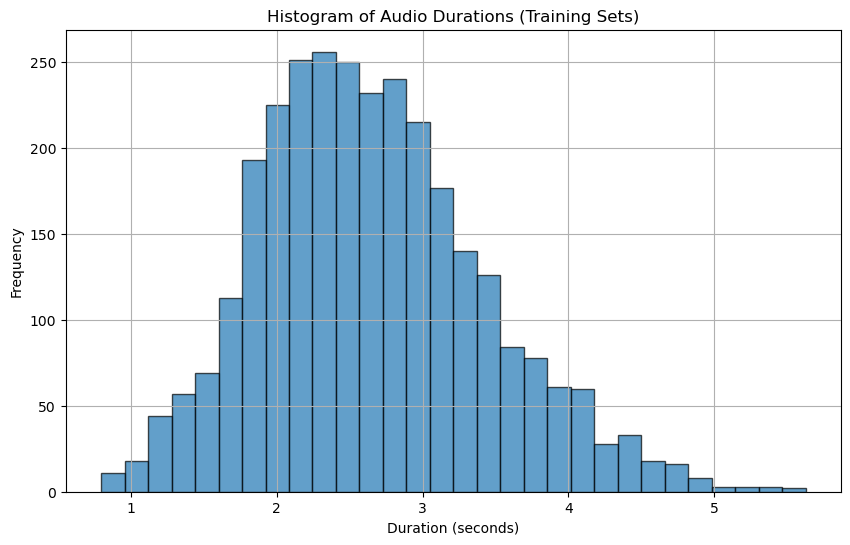

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(train_durations, bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Audio Durations (Training Sets)')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
import numpy as np

In [16]:
# Calculate the median duration from all durations
median_duration = np.median(train_durations)

# Print the median value
print(f"The median audio duration is: {median_duration:.2f} seconds")

The median audio duration is: 2.59 seconds


### Get Audios

In [17]:
def get_audios(folder):
    audios = []
    for file in os.listdir(folder):
        file_path = os.path.join(folder, file)
        audio, _ = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
        audios.append(audio)
    return audios

In [18]:
# train_audios = get_audios(folder_train_file)
# eval_audios = get_audios(folder_eval_file)
# dev_audios = get_audios(folder_dev_file)

In [19]:
# Get audio data samples
# print(train_audios)

### Voice Activity Detection

In [20]:
# import webrtcvad

In [21]:
# def apply_vad(audio, sample_rate):
#     # Convert audio to 16-bit PCM
#     audio = (audio * 32767).astype(np.int16)
    
#     vad = webrtcvad.Vad(2)  # Set aggressiveness mode (0-3)
#     frame_duration = 30  # Duration of each frame in ms
#     frame_size = sample_rate * frame_duration // 1000  # Convert ms to sample size
#     frames = [audio[i:i + frame_size] for i in range(0, len(audio), frame_size) if len(audio[i:i + frame_size]) == frame_size]
    
#     voiced_frames = [frame for frame in frames if vad.is_speech(frame.tobytes(), sample_rate)]
    
#     # Concatenate voiced frames back into a single audio array
#     voiced_audio = np.concatenate(voiced_frames)
    
#     return voiced_audio

# def cycle_through_files(folder):
#     voice_list, durations = [], []
#     for file in os.listdir(folder):
#         file_path = os.path.join(folder, file)
#         audio, sr = librosa.load(file_path, sr=None)  # Load audio with its original sampling rate
#         duration = librosa.get_duration(y=audio, sr=sr)  # Get the duration of the audio file
#         durations.append(duration)
        
#         voice = apply_vad(audio, sr)
#         voice_list.append(voice)

#     return voice_list, durations

In [22]:
# train_audio_vad, train_vad_durations = cycle_through_files(folder_train_file)
# eval_audio_vad, eval_vad_durations = cycle_through_files(folder_eval_file)
# dev_audio_vad, dev_vad_durations = cycle_through_files(folder_dev_file)

In [23]:
# plt.figure(figsize=(10, 6))
# plt.hist(train_vad_durations, bins=30, edgecolor='black', alpha=0.7)
# plt.title('Histogram of Audio Durations (Training Sets)')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.grid(True)
# plt.show()

In [24]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(train_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(train_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

In [25]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(eval_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(eval_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

In [26]:
# # Create a histogram with overlapping bars
# plt.figure(figsize=(10, 6))
# plt.hist(dev_durations, bins=30, color='blue', alpha=0.5, label='Dataset 1', edgecolor='black')
# plt.hist(dev_vad_durations, bins=30, color='red', alpha=0.5, label='Dataset 2', edgecolor='black')

# # Adding titles and labels
# plt.title('Duration Histograms')
# plt.xlabel('Duration (seconds)')
# plt.ylabel('Frequency')
# plt.legend()  # Show legend to distinguish between datasets
# plt.grid(True)

# # Show the plot
# plt.show()

Video Activity Detection (webrtcvad) has no impact on the durations of ASVSpoof2017 dataset

### Normalize Audio

In [27]:
def normalize_audio(audio):
    return audio / np.max(np.abs(audio))

def cycle_normalize_file(audios):
    normalized_audios = []
    for audio in audios:
        normalized_audio = normalize_audio(audio)
        normalized_audios.append(normalized_audio)

    return normalized_audios

In [28]:
# train_audios = cycle_normalize_file(train_audios)
# eval_audios = cycle_normalize_file(eval_audios)
# dev_audios = cycle_normalize_file(dev_audios)

### Noise Removal

In [29]:
import noisereduce as nr

c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def reduce_noise(audio, sr):
    return nr.reduce_noise(y=audio, sr=sr)

def cycle_reduce_noise_file(audios):
    noise_reduced_audios = []
    for audio in audios:        
        noise_reduced_audio = reduce_noise(audio, 16000)
        noise_reduced_audios.append(noise_reduced_audio)

    return noise_reduced_audios

In [31]:
# train_audios = cycle_reduce_noise_file(train_audios)
# eval_audios = cycle_normalize_file(eval_audios)
# dev_audios = cycle_normalize_file(dev_audios)

### Pre-Emphasis

In [32]:
def pre_emphasize(audio):
    alpha = 0.97
    pre_emphasized_audio = np.append(audio[0], audio[1:] - alpha * audio[:-1])
    return pre_emphasized_audio

def cycle_pre_emphasize_audio(audios):
    pre_emphasized_audios = []
    for audio in audios:
        pre_emphasized_audio = pre_emphasize(audio)
        pre_emphasized_audios.append(pre_emphasized_audio)

    return pre_emphasized_audios

In [33]:
# train_audios = cycle_pre_emphasize_audio(train_audios)
# eval_audios = cycle_pre_emphasize_audio(eval_audios)
# dev_audios = cycle_pre_emphasize_audio(dev_audios)

### Pad & Truncate Audio Files

In [34]:
def pad_and_truncate_audio(audio, target_duration, sample_rate):
    target_length = int(target_duration * sample_rate)
    
    if len(audio) < target_length:
        # Pad the audio with zeros
        pad_width = target_length - len(audio)
        return np.pad(audio, (0, pad_width), mode='constant')
    elif len(audio) > target_length:
        # Truncate the audio
        return audio[:target_length]
    return audio  # If already the correct length, return as is

def pad_and_truncate_files(audios):
    new_audio = []
    for audio in audios:
        processed_audio = pad_and_truncate_audio(audio, median_duration, 16000)
        new_audio.append(processed_audio)

    return new_audio

In [35]:
# train_audios = pad_and_truncate_files(train_audios)
# eval_audios = pad_and_truncate_files(eval_audios)
# dev_audios = pad_and_truncate_files(dev_audios)

In [36]:
train_audio_save_path = './Voice Liveness/Audio data read/train_audios.npy'
eval_audio_save_path = './Voice Liveness/Audio data read/eval_audios.npy'
dev_audio_save_path = './Voice Liveness/Audio data read/dev_audios.npy'

In [37]:
# np.save(train_audio_save_path, train_audios)
# np.save(eval_audio_save_path, eval_audios)
# np.save(dev_audio_save_path, dev_audios)

In [38]:
train_audios = np.load(train_audio_save_path)
eval_audios = np.load(eval_audio_save_path)
dev_audios = np.load(dev_audio_save_path)

### Framing

In [39]:
def frame(audio, frame_size, hop_length):
    audio = np.asarray(audio).flatten()  # Ensure audio is 1D
    return librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)

def cycle_frame_audio(audios):
    framed_audios = []
    for audio in audios:
        framed_audio = frame(audio, 400, 160)
        framed_audios.append(framed_audio)

    return framed_audios

### Windowing

In [40]:
def window(frames):
    window = np.hamming(frames.shape[0])
    return window

### LFCC

In [41]:
def compute_lfcc(audio, sr, num_coeffs=13):
    # Step 1: Framing
    framed_audio = frame(audio, 400, 160)

    # Step 2: Apply windowing to each frame
    hamming_window = np.hamming(framed_audio.shape[1])
    windowed_frames = framed_audio * hamming_window

    # Step 3: Fourier Transform and Power Spectrum
    spectrum = np.abs(scipy.fftpack.fft(windowed_frames, n=512))**2

    # Retain only the positive frequencies
    spectrum = spectrum[:, :spectrum.shape[1] // 2 + 1]  # (num_frames, 257)

    # Step 4: Filterbank energies
    num_filters = 40  # Typically, we use 40 filters for MFCC/LFCC
    filter_banks = librosa.filters.mel(sr=sr, n_fft=512, n_mels=num_filters)
    filter_banks_energies = np.dot(filter_banks, spectrum.T)  # Transpose spectrum for dot product

    # Step 5: Logarithm of filterbank energies
    log_filter_banks = np.log(filter_banks_energies + 1e-10)  # Add small value to avoid log(0)

    # Step 6: DCT (Discrete Cosine Transform)
    lfcc = dct(log_filter_banks, type=2, axis=1, norm='ortho')[:, :num_coeffs]

    return lfcc

In [42]:
def compute_lfcc_for_audios(audios, sr=16000):
    all_lfccs = []
    for audio in audios:
        lfcc = compute_lfcc(audio, sr)
        all_lfccs.append(lfcc)
    return all_lfccs

In [43]:
# train_lfcc = compute_lfcc_for_audios(train_audios)
# eval_lfcc = compute_lfcc_for_audios(eval_audios)
# dev_lfcc = compute_lfcc_for_audios(dev_audios)

In [44]:
# train_lfcc_array = np.array(train_lfcc)
# eval_lfcc_array = np.array(eval_lfcc)
# dev_lfcc_array = np.array(dev_lfcc)

# print("Train LFCC shape:", train_lfcc_array.shape)
# print("Eval LFCC shape:", eval_lfcc_array.shape)
# print("Dev LFCC shape:", dev_lfcc_array.shape)

In [45]:
train_lfcc_path = './Voice Liveness/Audio data read/train_lfcc.npy'
eval_lfcc_path = './Voice Liveness/Audio data read/eval_lfcc.npy'
dev_lfcc_path = './Voice Liveness/Audio data read/dev_lfcc.npy'

In [46]:
# np.save(train_lfcc_path, train_lfcc_array)
# np.save(eval_lfcc_path, eval_lfcc_array)
# np.save(dev_lfcc_path, dev_lfcc_array)

In [47]:
train_lfcc_array = np.load(train_lfcc_path)
eval_lfcc_array = np.load(eval_lfcc_path)
dev_lfcc_array = np.load(dev_lfcc_path)

In [48]:
print("Train LFCC shape:", train_lfcc_array.shape)
print("Eval LFCC shape:", eval_lfcc_array.shape)
print("Dev LFCC shape:", dev_lfcc_array.shape)

Train LFCC shape: (3014, 40, 13)
Eval LFCC shape: (13306, 40, 13)
Dev LFCC shape: (1710, 40, 13)


In [49]:
train_lfcc = train_lfcc_array.reshape(train_lfcc_array.shape[0], -1)
eval_lfcc = eval_lfcc_array.reshape(eval_lfcc_array.shape[0], -1)
dev_lfcc = dev_lfcc_array.reshape(dev_lfcc_array.shape[0], -1)

In [50]:
print("Train LFCC shape:", train_lfcc.shape)
print("Eval LFCC shape:", eval_lfcc.shape)
print("Dev LFCC shape:", dev_lfcc.shape)

Train LFCC shape: (3014, 520)
Eval LFCC shape: (13306, 520)
Dev LFCC shape: (1710, 520)


In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:47:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


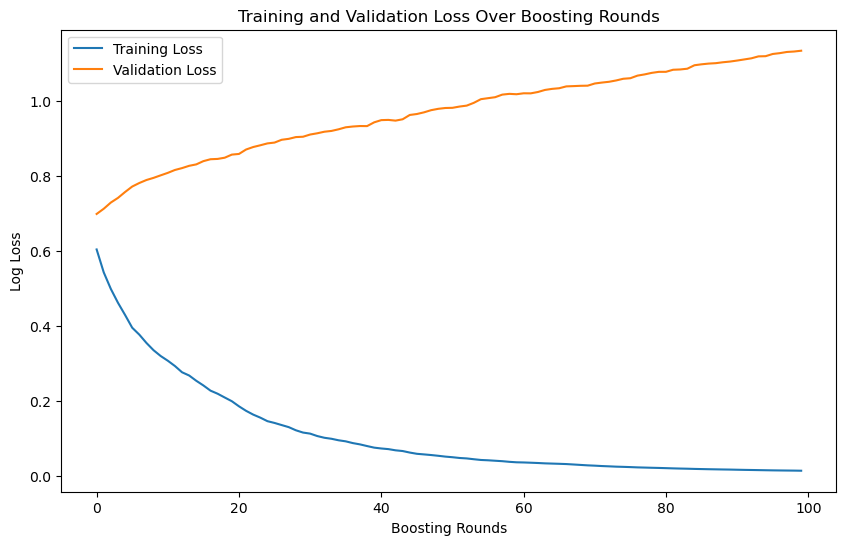

Accuracy: 56.79%
              precision    recall  f1-score   support

           0       0.92      0.57      0.70     12008
           1       0.12      0.54      0.20      1298

    accuracy                           0.57     13306
   macro avg       0.52      0.56      0.45     13306
weighted avg       0.84      0.57      0.65     13306



In [52]:
# Train an XGB classifier
lfcc_xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
eval_set = [(train_lfcc, train_labels), (dev_lfcc, dev_labels)]

lfcc_xgb_classifier.fit(train_lfcc, train_labels, eval_set=eval_set, verbose=False)

# Extract logloss history for training and validation
results = lfcc_xgb_classifier.evals_result()
train_loss = results['validation_0']['logloss']
eval_loss = results['validation_1']['logloss']

# Plotting training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(eval_loss, label='Validation Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss Over Boosting Rounds')
plt.legend()
plt.show()

# Test the SVM classifier on the test set
xgb_predictions = lfcc_xgb_classifier.predict(eval_lfcc)

# Evaluate the classifier
accuracy = accuracy_score(eval_labels, xgb_predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(eval_labels, xgb_predictions))

In [53]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV

In [54]:
split_index = [-1] * len(train_lfcc) + [0] * len(dev_lfcc)
predefined_split = PredefinedSplit(split_index)

# Concatenate training and dev data
X_combined = np.concatenate((train_lfcc, dev_lfcc), axis=0)
y_combined = np.concatenate((train_labels, dev_labels), axis=0)

In [55]:
param_grid = {
    'max_depth': [3, 5, 7],  # Depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'n_estimators': [50, 100, 200],  # Number of trees
    'subsample': [0.5, 0.7, 1.0],  # Fraction of samples used for fitting
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lfcc_xgb_classifier, param_grid=param_grid, 
                           scoring='accuracy', cv=predefined_split, verbose=1, 
                           n_jobs=1, return_train_score=True, error_score='raise')

# Fit GridSearchCV
grid_search.fit(X_combined, y_combined)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

train_scores = grid_search.cv_results_['mean_train_score']
val_scores = grid_search.cv_results_['mean_test_score']

print(f'Mean Train Score after Hyperparameter Tuning: {train_scores}')
print(f'Mean Validation Score after Hyperparameter Tuning: {val_scores}')

# Train the classifier with the best parameters
best_lfcc_xgb_classifier = grid_search.best_estimator_

# Test the classifier on the evaluation set
train_preds = best_lfcc_xgb_classifier.predict(train_lfcc)
dev_preds = best_lfcc_xgb_classifier.predict(dev_lfcc)
xgb_predictions = best_lfcc_xgb_classifier.predict(eval_lfcc)

# Evaluate the classifier
train_score = accuracy_score(train_labels, train_preds)
print(f"Dev Set Accuracy: {train_score * 100 :.4f}")
dev_score = accuracy_score(dev_labels, dev_preds)
print(f"Dev Set Accuracy: {dev_score * 100 :.4f}")
accuracy = accuracy_score(eval_labels, xgb_predictions)
print(f"Accuracy: {accuracy * 100:.4f}%")

# Print detailed classification report
print(f'train')
print(classification_report(train_labels, train_preds))
print(f'dev')
print(classification_report(dev_labels, dev_preds))
print(f'eval')
print(classification_report(eval_labels, xgb_predictions))

Fitting 1 folds for each of 81 candidates, totalling 81 fits


c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:47:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\andre\anaconda3\envs\python-cpu\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:47:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarn

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}
Mean Train Score after Hyperparameter Tuning: [0.7057067  0.71068348 0.70902455 0.71997346 0.71400133 0.7123424
 0.734572   0.73656271 0.73390843 0.78832117 0.7942933  0.7853351
 0.80291971 0.81121433 0.80955541 0.83576642 0.84472462 0.83609821
 0.87558062 0.90909091 0.89084273 0.90776377 0.93497014 0.92435302
 0.95089582 0.96914399 0.96118115 0.78234904 0.77305906 0.78201725
 0.84605176 0.86396815 0.85368281 0.9469144  0.94990046 0.94293298
 0.91937624 0.93331121 0.93861977 0.98838752 0.99535501 0.99601858
 1.         1.         1.         0.98805574 0.99535501 0.99834107
 1.         1.         1.         1.         1.         1.
 0.83908427 0.84671533 0.85036496 0.92103517 0.93961513 0.94426012
 0.98838752 0.99435965 0.99668215 0.97445255 0.98606503 0.99369608
 0.99966821 1.         1.         1.         1.         1.
 0.99834107 1.         1.         1.         1.         1.
 1.         1.

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [57]:
conf_matrix = confusion_matrix(eval_labels, xgb_predictions)

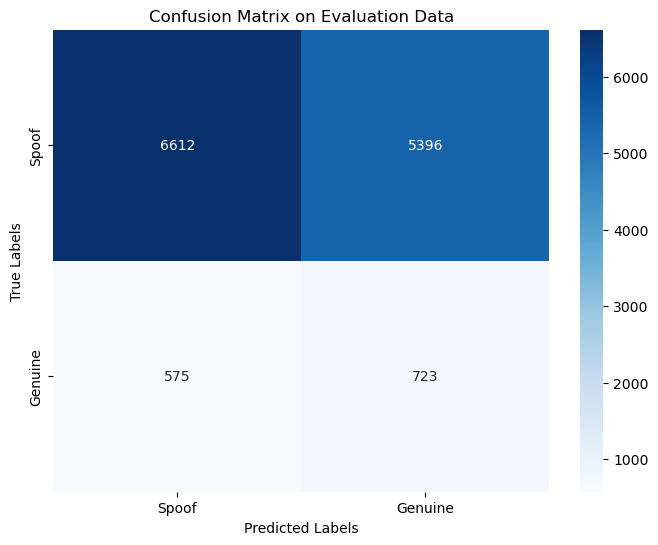

In [58]:
# Display confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Spoof', 'Genuine'], yticklabels=['Spoof', 'Genuine'])
plt.title("Confusion Matrix on Evaluation Data")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()